<a href="https://colab.research.google.com/github/knu6543/hello-world/blob/master/tml_helloworld.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Import required libraries


In [6]:
#import dependencies - set up all libs
!pip install tensorflow==2.0.0-beta0
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

Step 2: Generate data set

Normally, we would collect data from sensors or logs. Here, we're using code to generate a dataset

Generates 1000 values that are random points along a sine wave (values from 0 to 2*pi)

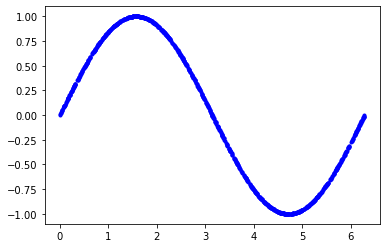

In [7]:
#Number of samples
SAMPLES = 1000

#Set seed value so that we can get same random numbers each time we run it
SEED = 1337 #any number
np.random.seed(SEED)
tf.random.set_seed(SEED)

#generate uniformly distributed set of random num from 0 to 2*pi (sine wave)
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)
#np.random.uniform returns array of rand nums in specified range

#shuffle values so that they're not in order - shuffling required  to train the model
np.random.shuffle(x_values)

#calc corresponding sine values
y_values = np.sin(x_values) #numpy does this on the entire array of x at once

#plot data. 'b.' arg is for the color of the dots in the plot
plt.plot(x_values, y_values, 'b.')
plt.show()



Step 3: Add random noise to data

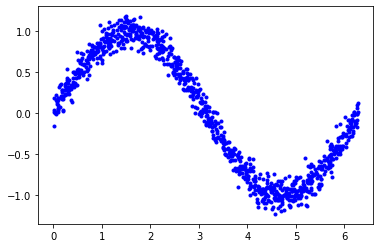

In [8]:
#Add a small rand num to each y_value
y_values += 0.1 * np.random.randn(*y_values.shape)

#Plot our data
plt.plot(x_values, y_values, 'b.')
plt.show()

Step 4: Split the data

60% training, 20% validation, 20% testing

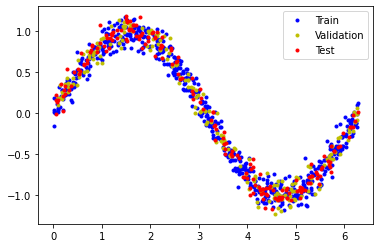

In [9]:
#Split data, remaining 20% is validation split
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

#Use np.split to divide the data in 3 parts
#np.split takes array of data and array of indices and chops data into parts at the indices provided
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

#Verify that the split is correct: 
assert (x_train.size + x_validate.size + x_test.size) == SAMPLES

#Plot data in each partition and see: 
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validation")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
plt.show()


Step 5: Define a basic model



*   A model that takes input value X and predicts numberic output value (sin of X) - known as regression

*   Design a simple NN that uses layers of neurons to learn patterns in training data using Keras







In [11]:
#Use Keras to create simple model arch
from tensorflow.keras import layers
model_1 = tf.keras.Sequential() #each layer of neurons is stacked on top of the next

#Layer 1 - scalar input and feeds it thru 16 neurons and activate thru reLU
#sinle input X, 16 neurons. Dense = fully connected
#Amount of activation of each neuron is based on its weight and bias values learned during training and its activation function
#activation = activation_function((input*weight)+bias) --> linear regression
#Without activation, output of neuron will always be linear func of its input --> means we can only model linear relationships of X and y
model_1.add(layers.Dense(16, activation='relu', input_shape=(1,)))

#Final layer - single neuron since we only want a single output value
#this will receive 16 inputs, and we don't specify activation func, we just want the raw result (since regression. For classification, we would pass it thru act)
#output of this neuron is calculated as: 
#   output = sum((inputs*weights) + bias)
#weights and biases are learned during training
model_1.add(layers.Dense(1))

#compile model using std optimizer and loss func for regression
#optimizer - specifies algo that will adjust the network to model input during training
#loss - specifies method used during training to calc error for single training example (how far network's predictions are from reality)
    #whereas cost func calculates error for entire training set
#metrics - specifies additional funcs to judge perf of model
#mae = mean absolute error
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

#Print summary of model's arch
model_1.summary()

#Num of weights for this model = num of connections between neurons in model
#input X to 16 neurons = 16 weights
#16 neurons to output y = 16 weights  = total 32
#every neuron has a bias = 17 biases (layer 1 and layer 2)
#final params = 32 + 17 = 49

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


Step 6: Training the model

In [12]:
history_1 = model_1.fit(x_train, y_train, epochs=1000, batch_size=16, validation_data=(x_validate, y_validate))

#x_train and y_train is used to train the network
#epochs - how many times entire training set will be run thru the network during training
  #More epochs - not necessarily means more training
  #There can be chance of overfitting data or stop improving loss func over time
#Batch size - how many pieces of training data to feed into the network before measuring accuracy and updating weights and biases
  #smaller batch size - more computation time
  #larger batch size - less accurate results and possible overfit
#Validation data - this data will be run thru ntwk throughout training process and predictions will be compared with expected values

#------------------------
#Loss - the smaller the better
#mae - avg diff between ntwk prediction and expected y
#val_loss - loss func output on validation data. If training loss < validation loss, ntwk might be overfitting! It means it's performing worse on data it hasn't seen before!
#val_mae - mae on validation data


Train on 600 samples, validate on 200 samples
Epoch 1/1000
600/600 [==============================] - 0s 373us/sample - loss: 0.8434 - mae: 0.8117 - val_loss: 0.6154 - val_mae: 0.7077
Epoch 2/1000
600/600 [==============================] - 0s 95us/sample - loss: 0.4991 - mae: 0.6286 - val_loss: 0.4757 - val_mae: 0.6060
Epoch 3/1000
600/600 [==============================] - 0s 93us/sample - loss: 0.4242 - mae: 0.5664 - val_loss: 0.4282 - val_mae: 0.5683
Epoch 4/1000
600/600 [==============================] - 0s 91us/sample - loss: 0.3849 - mae: 0.5390 - val_loss: 0.3891 - val_mae: 0.5415
Epoch 5/1000
600/600 [==============================] - 0s 97us/sample - loss: 0.3506 - mae: 0.5137 - val_loss: 0.3536 - val_mae: 0.5125
Epoch 6/1000
600/600 [==============================] - 0s 96us/sample - loss: 0.3187 - mae: 0.4909 - val_loss: 0.3210 - val_mae: 0.4861
Epoch 7/1000
600/600 [==============================] - 0s 97us/sample - loss: 0.2903 - mae: 0.4688 - val_loss: 0.2930 - val_mae: 0

Step 7: Analysis/Graphing the history

Figure out why the model is not doing a good job of making accurate predictions using the data collected from step 6 (history_1 object)

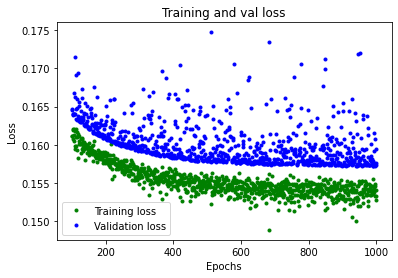

In [15]:
#Extract info from history object
#history_1.history is a dictionary that records metric values during training and validation
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(1, len(loss)+1)
'''
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
'''
SKIP = 100

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#error decreases but after a point flattens out, so the model is no longer learning
#Val loss is consistently higher than training loss so something is wrong with model

Plot some more info from history object

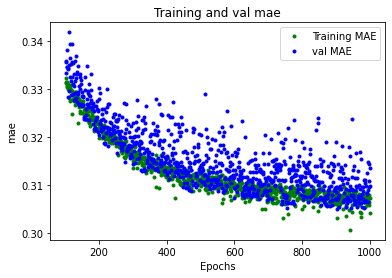

In [16]:
#Plot mae 
mae = history_1.history['mae']
val_mae = history_1.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='val MAE')
plt.title('Training and val mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

Plot training data against expected values to get more insight on what's happening

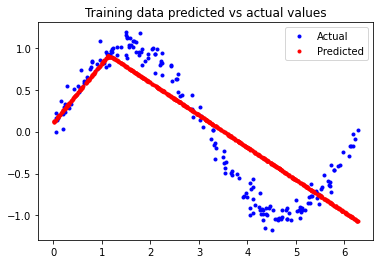

In [17]:
#Predict outputs
predictions = model_1.predict(x_train) #runs inference on all x_train values

#Plot predictions with test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(x_test,y_test,'b.', label='Actual')
plt.plot(x_train, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

#Plot shows that ntwk approximates sine function in a very limited way
#predictions are highly linear and don't fit the data well
#can try making the model bigger

Step 8: Improving the model

Add another layer of neurons to the network and check if performance improves

In [19]:
model_2 = tf.keras.Sequential()

model_2.add(layers.Dense(16, activation='relu', input_shape=(1,)))
model_2.add(layers.Dense(16, activation='relu')) #additional layer in between
model_2.add(layers.Dense(1))

model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model_2.summary()

#Now network has (1*16) + (16*16) + (16*1) = 288 weights
#16+16+1 = 33 biases
#total = 321 from 49!

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


Step 9: Train new model

In [20]:
history_2 = model_2.fit(x_train, y_train, epochs = 600, batch_size=16, validation_data=(x_validate, y_validate))


Train on 600 samples, validate on 200 samples
Epoch 1/600
600/600 [==============================] - 0s 396us/sample - loss: 0.3833 - mae: 0.5357 - val_loss: 0.3683 - val_mae: 0.5255
Epoch 2/600
600/600 [==============================] - 0s 94us/sample - loss: 0.3241 - mae: 0.4945 - val_loss: 0.3162 - val_mae: 0.4807
Epoch 3/600
600/600 [==============================] - 0s 96us/sample - loss: 0.2761 - mae: 0.4580 - val_loss: 0.2673 - val_mae: 0.4446
Epoch 4/600
600/600 [==============================] - 0s 108us/sample - loss: 0.2368 - mae: 0.4256 - val_loss: 0.2314 - val_mae: 0.4139
Epoch 5/600
600/600 [==============================] - 0s 106us/sample - loss: 0.2074 - mae: 0.3992 - val_loss: 0.2046 - val_mae: 0.3871
Epoch 6/600
600/600 [==============================] - 0s 96us/sample - loss: 0.1838 - mae: 0.3744 - val_loss: 0.1852 - val_mae: 0.3701
Epoch 7/600
600/600 [==============================] - 0s 101us/sample - loss: 0.1677 - mae: 0.3560 - val_loss: 0.1683 - val_mae: 0.348

Step 10: Plot new graphs

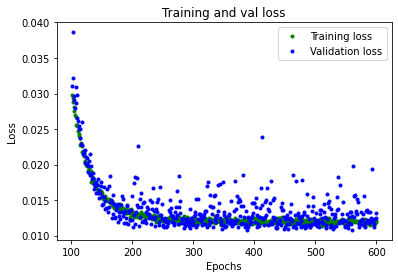

In [23]:
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(1,len(loss)+1)
'''
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
'''
SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Plot MAE

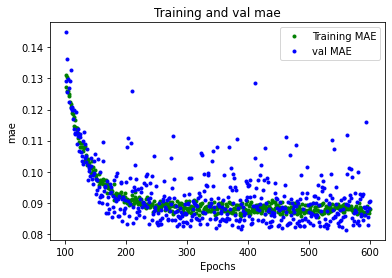

In [24]:
#Plot mae
plt.clf()
 
mae = history_2.history['mae']
val_mae = history_2.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='val MAE')
plt.title('Training and val mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

Step 11: Testing



*   After we use the test data, better to avoid tuning the model further to improve test performance. This can cause overfitting the test set
*   If model performs badly on fresh data that it hasn't seen before, we'll have to come up with a brand new arch!



200/200 [==============================] - 0s 149us/sample - loss: 0.0116 - mae: 0.0851


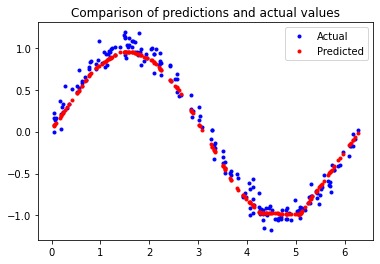

In [25]:
#Calc loss on test data
loss = model_2.evaluate(x_test, y_test)

#make predictions based on test data
predictions = model_2.predict(x_test)

#graph
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

#Small loss and mae
#ntwk learned to approximate a sine curve even when training data was noisy
#Some imperfections near peak and trough - mild case of overfitting
#this means instead of leanring smooth sine func, model learned to replicate exact shape of the data
#if there was more overfitting, we can try regularization or add more training data

Step 12: Convert model for TensorFlow Lite



*   TF Lite Converter - converts TF models into space-efficient format to use on memory-constrained devices and make the model faster

*   TF Lite Interpreter - Runs the converted model using the most efficient operations for a given device

* Accuracy may reduce but often small
* Quantization: 
    *  By default, weights and biases are stored as 32-bit FP numbers for high-precision calcs during training
    *  Quantization allows to reduce the precision of these numbers into 8-bit integers (instead of floats and 4x size redux)
    *  Minimal loss in accuracy!

In [26]:
#Convert model into TF lite without Quantization

converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
tflite_model = converter.convert()

#save model to disk
open("sine_model.tflite", "wb").write(tflite_model)

#Convert model into TF lite format WITH quantization

converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
#indicate that we want to perform default optimizations which include quant
converter.optimizations = [tf.lite.Optimize.DEFAULT]

#define generator func that provides test_data x_values as a representative dataset and tell converter to use it
def representative_dataset_generator():
  for value in x_test:
    yield [np.array(value, dtype=np.float32, ndmin=2)]

converter.representative_dataset = representative_dataset_generator

#convert the mmodel
tflite_model = converter.convert()

#save model to disk
open("sine_model_quantized.tflite", "wb").write(tflite_model)

#representative dataset - set of nums that represent the full range of input vlaues of dataset on which the model was trained
#this creates quantized model that runs as efficiently as possible

INFO:tensorflow:Converted 6 variables to const ops.
INFO:tensorflow:Converted 6 variables to const ops.


2432

Step 13: Compare original and TFLite models

Keras API is very simple to make predictions. We could just call predict() method and pass array of inputs

With TF Lite, we have to do these: 
*  Instantiate interpreter object
*  Call methods that allocate memory for the model
*  Write input to the input tensor
*  Invoke the model
*  Read output from output tensor

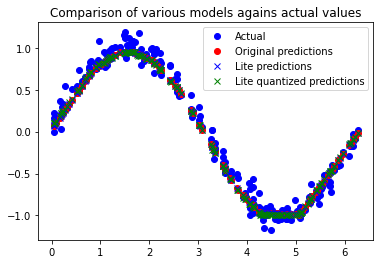

In [27]:
#Instantiate interpreter object for each model (quant and non)
sine_model = tf.lite.Interpreter('sine_model.tflite')
sine_model_quantized = tf.lite.Interpreter('sine_model_quantized.tflite')

#Allocate memory for each model
sine_model.allocate_tensors()
sine_model_quantized.allocate_tensors()

#get indices of input and output tensors
sine_model_input_index = sine_model.get_input_details()[0]["index"]
sine_model_output_index = sine_model.get_output_details()[0]["index"]
sine_model_quantized_input_index = sine_model_quantized.get_input_details()[0]["index"]
sine_model_quantized_output_index = sine_model_quantized.get_output_details()[0]["index"]

#Create arrays to store the results
sine_model_predictions = []
sine_model_quantized_predictions = []

#Run each model's interpreter for each value & store results in arrays
for x_value in x_test:
  #Create 2D tensor wrapping current x value
  x_value_tensor = tf.convert_to_tensor([[x_value]], dtype=np.float32)

  #write value to input tensor
  sine_model.set_tensor(sine_model_input_index, x_value_tensor)

  #Run inference
  sine_model.invoke()

  #Read prediction from output tensor
  sine_model_predictions.append(sine_model.get_tensor(sine_model_output_index)[0])

  #Do same for quantized model
  sine_model_quantized.set_tensor(sine_model_quantized_input_index, x_value_tensor)
  sine_model_quantized.invoke()
  sine_model_quantized_predictions.append(sine_model_quantized.get_tensor(sine_model_quantized_output_index)[0])

#See how they line up with data
plt.clf()
plt.title('Comparison of various models agains actual values')
plt.plot(x_test, y_test, 'bo', label='Actual')
plt.plot(x_test, predictions, 'ro', label='Original predictions')
plt.plot(x_test, sine_model_predictions, 'bx', label='Lite predictions')
plt.plot(x_test, sine_model_quantized_predictions, 'gx', label='Lite quantized predictions')
plt.legend()
plt.show()



Step 14: Compare converted model sizes

In addition to weights and biases, model also contains all the logic that makes up the architecture of the DNN known as its "computation graph"

For tiny models, this graph size > model's weights --> quantization has little effect

For complex models with more weights, quant will help much more

But, our quant model will take less *time* to execute than orig version which is important on a uctrller

In [28]:
import os
basic_model_size = os.path.getsize("sine_model.tflite")
print("Basic model is %d bytes" % basic_model_size)
quantized_model_size = os.path.getsize("sine_model_quantized.tflite")
print("Quantized model is %d bytes" % quantized_model_size)
difference = basic_model_size - quantized_model_size
print("Difference is %d bytes" % difference)

Basic model is 2656 bytes
Quantized model is 2432 bytes
Difference is 224 bytes


Step 15: Convert to C File

*  So far, we used TF Lite Python API which uses interpreter to load model files from disk
*  uctrllers don't have a filesystem and we can't afford to load models from disk given the limited space
*  Instead, we convert model to C src file that is included in binary and loaded directly into memory
*  This is done with Unix tool xxd that converts given file into required format

In [29]:
#Install xxd 
!apt-get -qq install xxd

#Save file as C src file
!xxd -i sine_model_quantized.tflite > sine_model_quantized.cc

#Print src file
!cat sine_model_quantized.cc

Selecting previously unselected package xxd.
(Reading database ... 146374 files and directories currently installed.)
Preparing to unpack .../xxd_2%3a8.0.1453-1ubuntu1.4_amd64.deb ...
Unpacking xxd (2:8.0.1453-1ubuntu1.4) ...
Setting up xxd (2:8.0.1453-1ubuntu1.4) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
unsigned char sine_model_quantized_tflite[] = {
  0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x00, 0x00,
  0x00, 0x00, 0x0e, 0x00, 0x18, 0x00, 0x04, 0x00, 0x08, 0x00, 0x0c, 0x00,
  0x10, 0x00, 0x14, 0x00, 0x0e, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00,
  0x10, 0x09, 0x00, 0x00, 0x58, 0x02, 0x00, 0x00, 0x40, 0x02, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0x0b, 0x00, 0x00, 0x00, 0x30, 0x02, 0x00, 0x00,
  0x1c, 0x02, 0x00, 0x00, 0xc4, 0x01, 0x00, 0x00, 0xb4, 0x00, 0x00, 0x00,
  0xac, 0x00, 0x00, 0x00, 0x8c, 0x00, 0x00, 0x00, 0x84, 0x00, 0x00, 0x00,
  0x7c, 0x00, 0x00, 0x00, 0x2c, 0x00, 0x00, 0x00, 0x24, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0x12, 0xfe,